<a href="https://colab.research.google.com/github/lovelessbhartal12/machine-learning-codebase/blob/main/adbosting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [24]:
df=pd.DataFrame()

In [27]:
df['x1']=[1,2,3,4,5,6,7,7,8,9]

df['x2']=[5,3,6,8,1,9,2,6,7,4]
df['label']=[1,0,1,0,1,1,0,0,1,1]


In [28]:
df

,x1,x2,label
0,1,5,1
1,2,3,0
2,3,6,1
3,4,8,0
4,5,1,1
5,6,9,1
6,7,2,0
7,7,6,0
8,8,7,1
9,9,4,1


<Axes: xlabel='x1', ylabel='x2'>

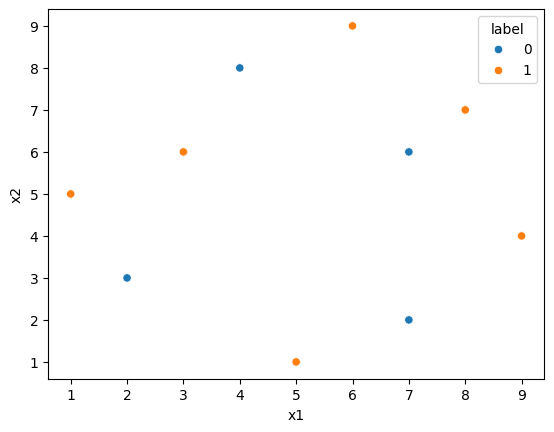

In [29]:
import seaborn as sns
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['label'])


In [30]:
df['weight']=1/df.shape[0]

In [31]:
df

,x1,x2,label,weight
0,1,5,1,0.1
1,2,3,0,0.1
2,3,6,1,0.1
3,4,8,0,0.1
4,5,1,1,0.1
5,6,9,1,0.1
6,7,2,0,0.1
7,7,6,0,0.1
8,8,7,1,0.1
9,9,4,1,0.1


In [32]:
from sklearn.tree import DecisionTreeClassifier


In [33]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]


In [37]:
dt=DecisionTreeClassifier(max_depth=1)
dt.fit(x,y)


DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.625, 0.5, '  False')]

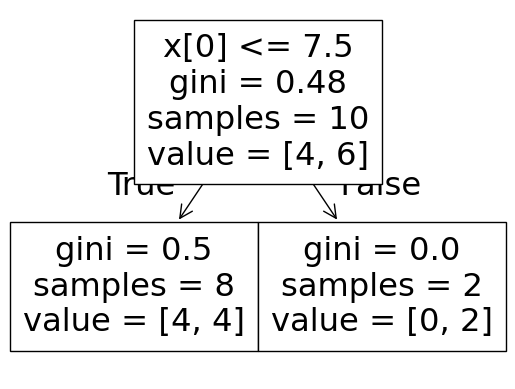

In [40]:
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

plot_tree(dt)

<Axes: >

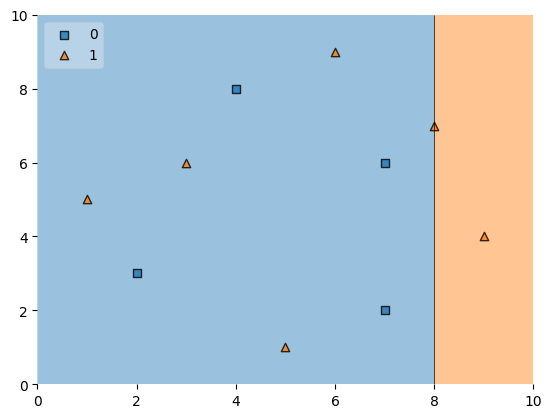

In [44]:
plot_decision_regions(np.array(x),np.array(y),clf=dt,legend=2)

In [46]:
df['pred']=dt.predict(x)
df

,x1,x2,label,weight,pred
0,1,5,1,0.1,0
1,2,3,0,0.1,0
2,3,6,1,0.1,0
3,4,8,0,0.1,0
4,5,1,1,0.1,0
5,6,9,1,0.1,0
6,7,2,0,0.1,0
7,7,6,0,0.1,0
8,8,7,1,0.1,1
9,9,4,1,0.1,1


In [52]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/error)

In [53]:
alpha1= calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [55]:
def updated_weight(row,alpha=0.423):
  if(row['label']==row['pred']):
    return row['weight']*np.exp(-alpha)
  else:
    return row['weight']*np.exp(alpha)

In [57]:
df['updated_weight']=df.apply(updated_weight,axis=1)


,x1,x2,label,weight,pred,updated_weight
0,1,5,1,0.1,0,0.152653
1,2,3,0,0.1,0,0.065508
2,3,6,1,0.1,0,0.152653
3,4,8,0,0.1,0,0.065508
4,5,1,1,0.1,0,0.152653
5,6,9,1,0.1,0,0.152653
6,7,2,0,0.1,0,0.065508
7,7,6,0,0.1,0,0.065508
8,8,7,1,0.1,1,0.065508
9,9,4,1,0.1,1,0.065508


In [61]:
df['normalized_weight']=df['updated_weight']/df['updated_weight'].sum()
df['normalized_weight'].sum()


np.float64(1.0)

In [66]:
df['lower_range']=df['upper_range']-df['normalized_weight']
df['upper_range']=np.cumsum(df['normalized_weight'])
df


,x1,x2,label,weight,pred,updated_weight,normalized_weight,upper_range,lower_range
0,1,5,1,0.1,0,0.152653,0.152097,0.152097,0.000000
1,2,3,0,0.1,0,0.065508,0.065269,0.217366,0.152097
2,3,6,1,0.1,0,0.152653,0.152097,0.369462,0.217366
3,4,8,0,0.1,0,0.065508,0.065269,0.434731,0.369462
4,5,1,1,0.1,0,0.152653,0.152097,0.586828,0.434731
5,6,9,1,0.1,0,0.152653,0.152097,0.738924,0.586828
6,7,2,0,0.1,0,0.065508,0.065269,0.804193,0.738924
7,7,6,0,0.1,0,0.065508,0.065269,0.869462,0.804193
8,8,7,1,0.1,1,0.065508,0.065269,0.934731,0.869462
9,9,4,1,0.1,1,0.065508,0.065269,1.000000,0.934731


In [69]:
df[['x1', 'x2', 'label', 'weight', 'pred', 'updated_weight', 'lower_range', 'upper_range']]



,x1,x2,label,weight,pred,updated_weight,lower_range,upper_range
0,1,5,1,0.1,0,0.152653,0.000000,0.152097
1,2,3,0,0.1,0,0.065508,0.152097,0.217366
2,3,6,1,0.1,0,0.152653,0.217366,0.369462
3,4,8,0,0.1,0,0.065508,0.369462,0.434731
4,5,1,1,0.1,0,0.152653,0.434731,0.586828
5,6,9,1,0.1,0,0.152653,0.586828,0.738924
6,7,2,0,0.1,0,0.065508,0.738924,0.804193
7,7,6,0,0.1,0,0.065508,0.804193,0.869462
8,8,7,1,0.1,1,0.065508,0.869462,0.934731
9,9,4,1,0.1,1,0.065508,0.934731,1.000000
